# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Memuat dataset ke dalam DataFrame
file_path = '/content/drive/MyDrive/Dataset Clustering/bank_transactions_data.csv'
dataset = pd.read_csv(file_path, delimiter=',')

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(dataset.info())

# Menampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
print(dataset.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accou

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Memastikan dataset terbaca dengan benar
print("Beberapa Baris Pertama Dataset:")
print(dataset.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(dataset.info())

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(dataset.shape)
print("\nJenis Data pada Setiap Kolom:")
print(dataset.dtypes)

Beberapa Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70         

In [ ]:
# 2. Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom:")
missing_values = dataset.isnull().sum()
print(missing_values)

# Mengisi nilai yang hilang pada kolom numerikal dengan mean
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[col] > 0:
        dataset[col] = dataset[col].fillna(dataset[col].mean())

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in dataset.select_dtypes(include=['object']).columns:
    if missing_values[col] > 0:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])


Data yang Hilang pada Setiap Kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64



Statistik Deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


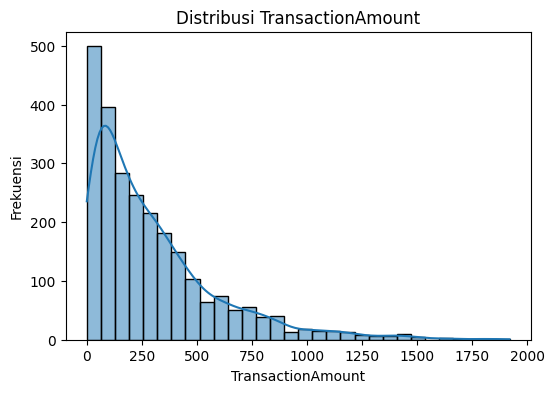

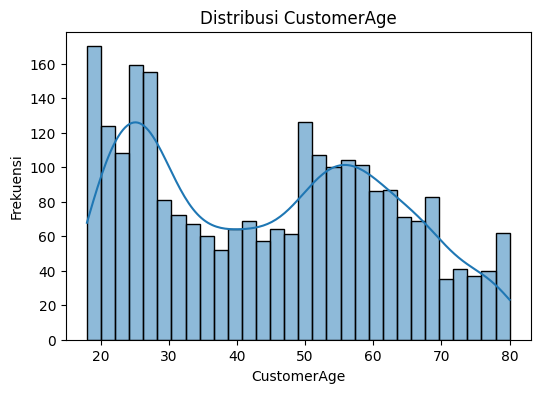

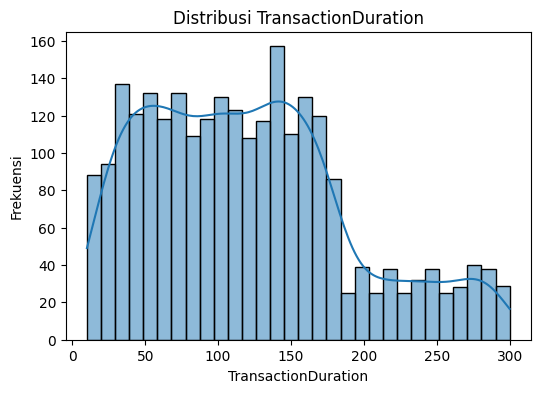

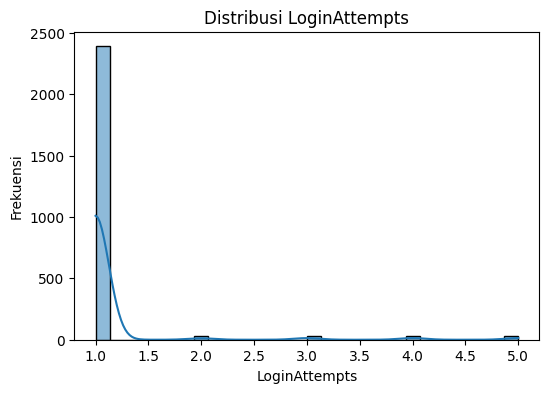

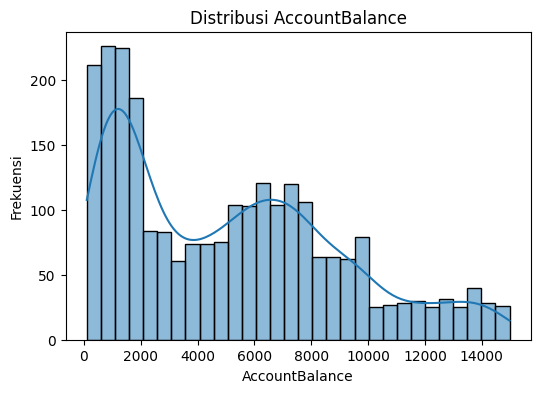

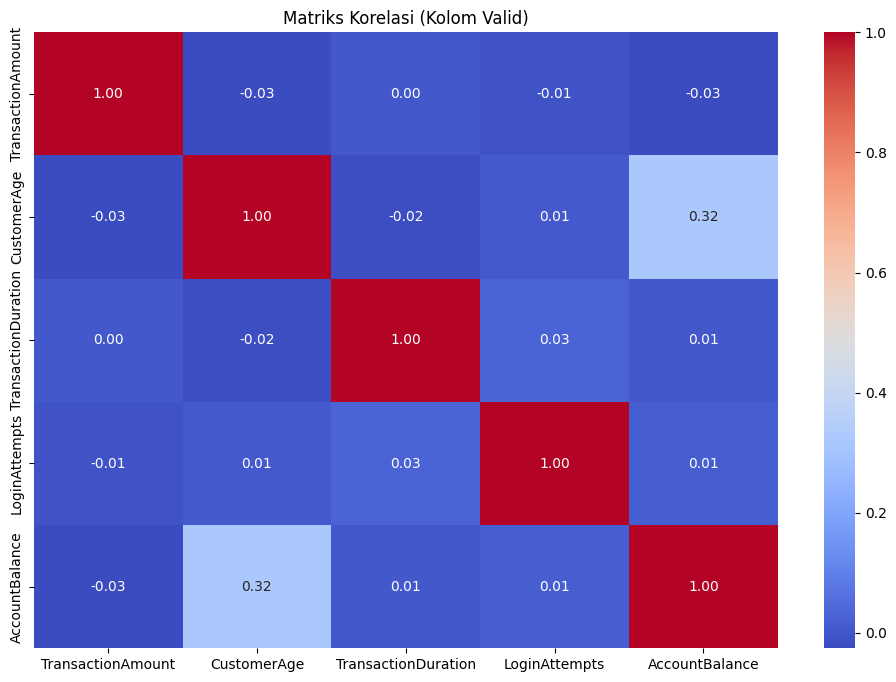

In [ ]:
# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(dataset.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi
# Filter kolom numerikal
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hapus kolom yang seluruh nilainya NaN
valid_numerical_cols = dataset[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if dataset[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = dataset[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")


Kolom `TransactionID` memiliki terlalu banyak kategori (2512). Menampilkan hanya 20 teratas.


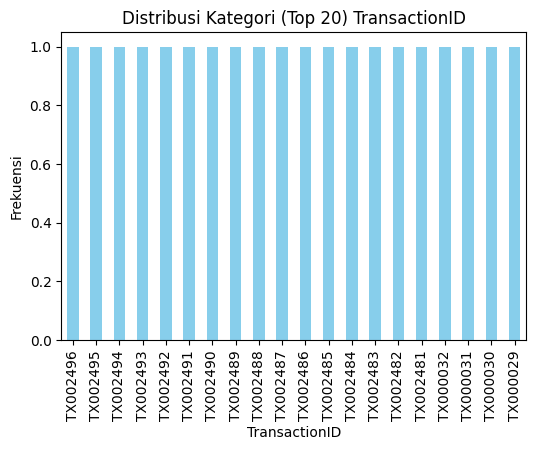


Kolom `AccountID` memiliki terlalu banyak kategori (495). Menampilkan hanya 20 teratas.


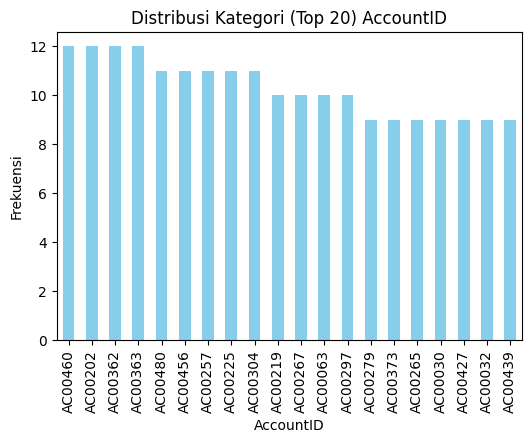


Kolom `TransactionDate` memiliki terlalu banyak kategori (2512). Menampilkan hanya 20 teratas.


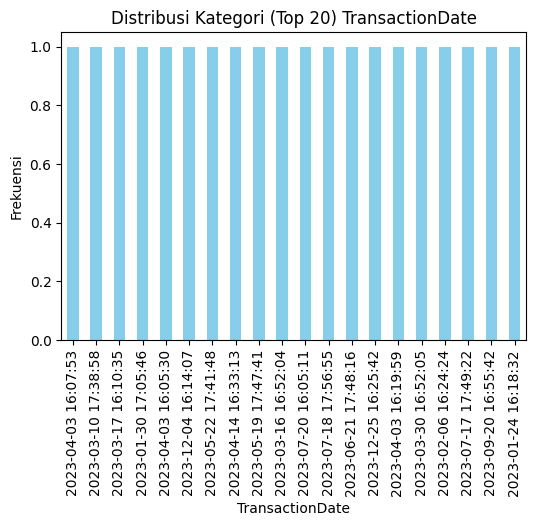

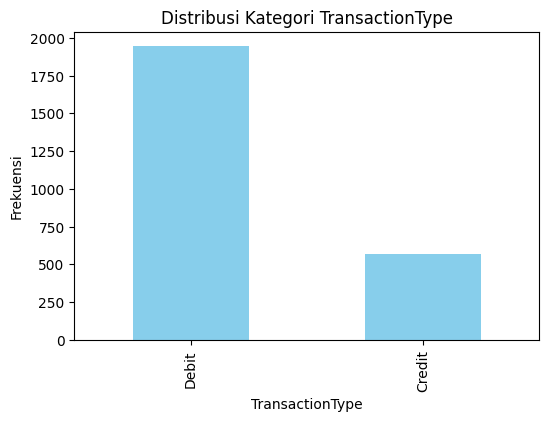


Kolom `Location` memiliki terlalu banyak kategori (43). Menampilkan hanya 20 teratas.


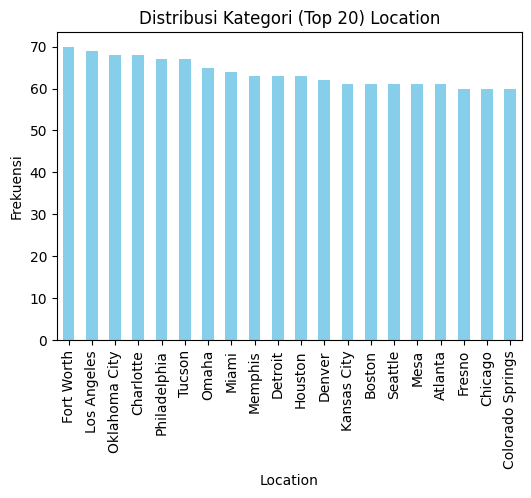


Kolom `DeviceID` memiliki terlalu banyak kategori (681). Menampilkan hanya 20 teratas.


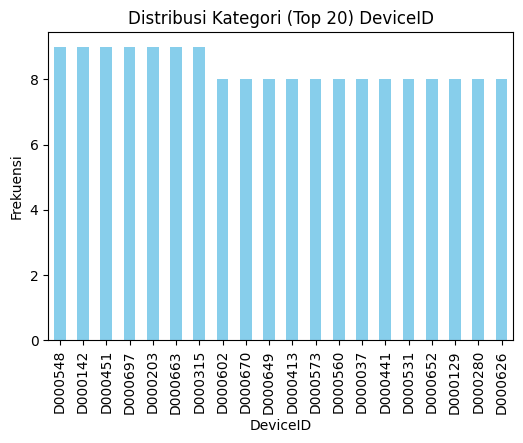


Kolom `IP Address` memiliki terlalu banyak kategori (592). Menampilkan hanya 20 teratas.


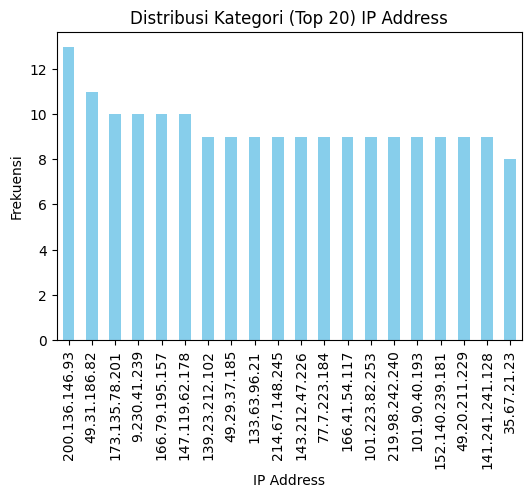


Kolom `MerchantID` memiliki terlalu banyak kategori (100). Menampilkan hanya 20 teratas.


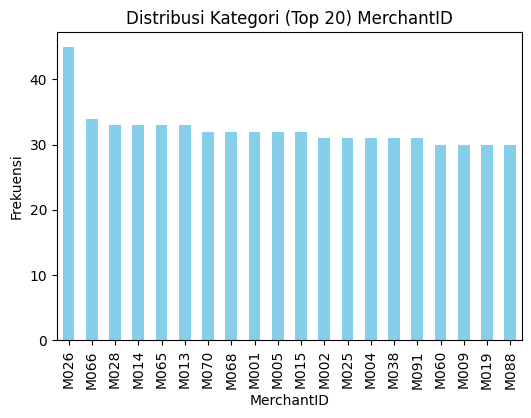

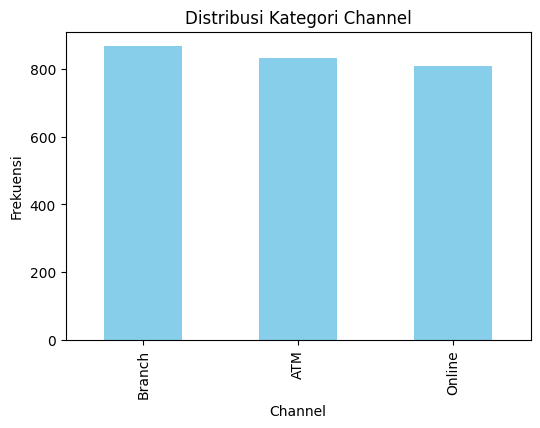

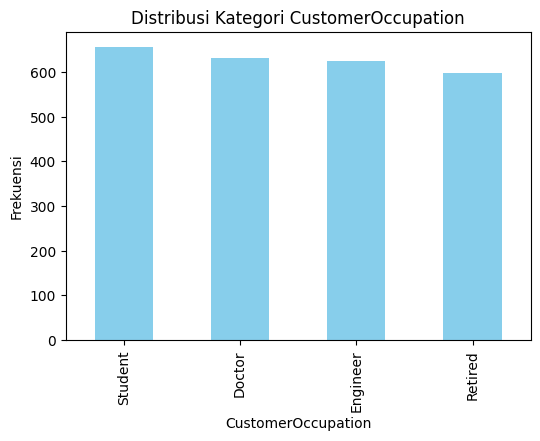


Kolom `PreviousTransactionDate` memiliki terlalu banyak kategori (360). Menampilkan hanya 20 teratas.


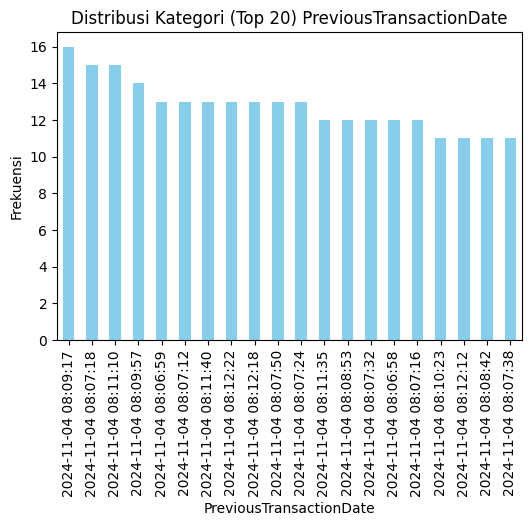

In [ ]:
# 4. Visualisasi Data Kategorikal
max_unique_values = 20  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = dataset[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = dataset[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        dataset[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# 1. Menghapus atau Menangani Data Kosong (Sudah ditangani sebelumnya)
print("Jumlah Nilai Kosong Setelah Penanganan:")
print(dataset.isnull().sum())

Jumlah Nilai Kosong Setelah Penanganan:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
# 2. Menghapus Data Duplikasi
print("\nJumlah Baris Sebelum Menghapus Duplikasi:", dataset.shape[0])
dataset.drop_duplicates(inplace=True)
print("Jumlah Baris Setelah Menghapus Duplikasi:", dataset.shape[0])


Jumlah Baris Sebelum Menghapus Duplikasi: 2512
Jumlah Baris Setelah Menghapus Duplikasi: 2512


In [ ]:
# 3. Normalisasi atau Standarisasi Fitur

# Pilih fitur yang relevan
numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"] # Fitur numerik
categorical_features = ["TransactionType"]  # Fitur kategorikal

# Memisahkan data numerik dan kategorikal
df_numerical = dataset[numerical_features]
df_categorical = dataset[categorical_features]

# Normalisasi fitur numerik
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

In [ ]:
# 4. Deteksi dan Penanganan Outlier
# Menggunakan metode IQR (Interquartile Range)
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah Outlier Teridentifikasi:", outliers.sum())
# Menghapus outlier jika diperlukan
dataset = dataset[~outliers]
print("Jumlah Baris Setelah Menghapus Outlier:", dataset.shape[0])


Jumlah Outlier Teridentifikasi: 230
Jumlah Baris Setelah Menghapus Outlier: 2282


In [ ]:
# 5. Encoding Data Kategorikal
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cat = encoder.fit_transform(df_categorical)
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
# 6. Binning (Pengelompokan Data)
num_features = numerical_features
df_preprocessed = pd.concat([df_numerical[num_features], encoded_cat_df], axis=1)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Membangun model clustering dengan K-Means (Memilih algoritma yang sesuai)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
dataset["Cluster"] = kmeans.fit_predict(df_preprocessed.loc[dataset.index])

# Menampilkan jumlah data dalam setiap klaster
print(dataset["Cluster"].value_counts())

Cluster
1    1234
0    1048
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah klaster: 2, Silhouette Score: 0.6181000110600853 - Disimpan
Jumlah klaster: 3, Silhouette Score: 0.6236256571079495 - Disimpan
Jumlah klaster: 4, Silhouette Score: 0.5967983377191037 - Disimpan
Jumlah klaster: 5, Silhouette Score: 0.5712150899603328 - Disimpan
Jumlah klaster: 6, Silhouette Score: 0.5338190769715265 - Tidak Disimpan
Jumlah klaster: 7, Silhouette Score: 0.4797163877647187 - Tidak Disimpan
Jumlah klaster: 8, Silhouette Score: 0.47405352613073526 - Tidak Disimpan
Jumlah klaster: 9, Silhouette Score: 0.4584868180215132 - Tidak Disimpan


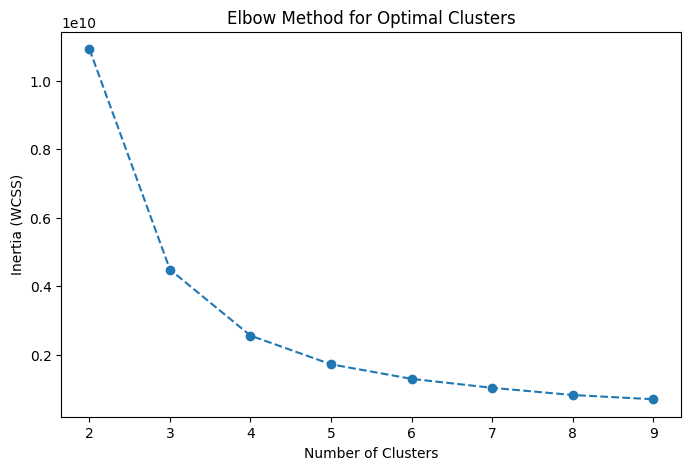

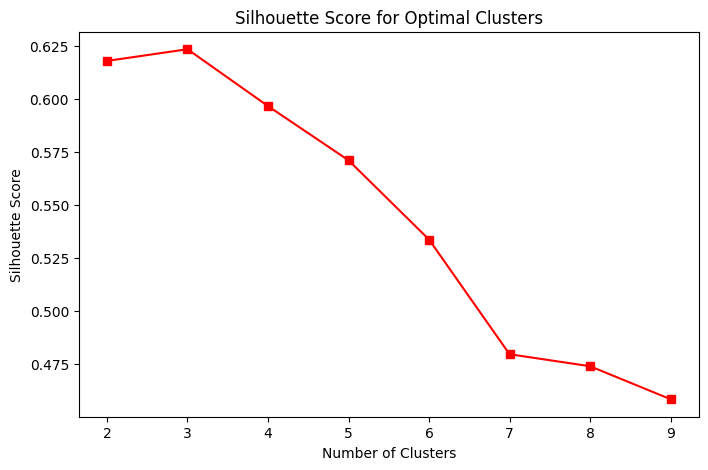


Jumlah cluster optimal berdasarkan Silhouette Score: 3


In [ ]:
## Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Uji jumlah klaster dari 2 hingga 10

valid_cluster_labels = []
df_final = df_preprocessed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_final)

    # Simpan inertia (WCSS) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Simpan cluster label jika Silhouette Score >= 0.55
    if silhouette_avg >= 0.55:
        valid_cluster_labels.append(cluster_labels)
        print(f"Jumlah klaster: {k}, Silhouette Score: {silhouette_avg} - Disimpan")
    else:
        print(f"Jumlah klaster: {k}, Silhouette Score: {silhouette_avg} - Tidak Disimpan")

# Visualisasi Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.show()

# Pilih jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

In [ ]:
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

Silhouette Score Tanpa Feature Selection: 0.6181000110600853


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

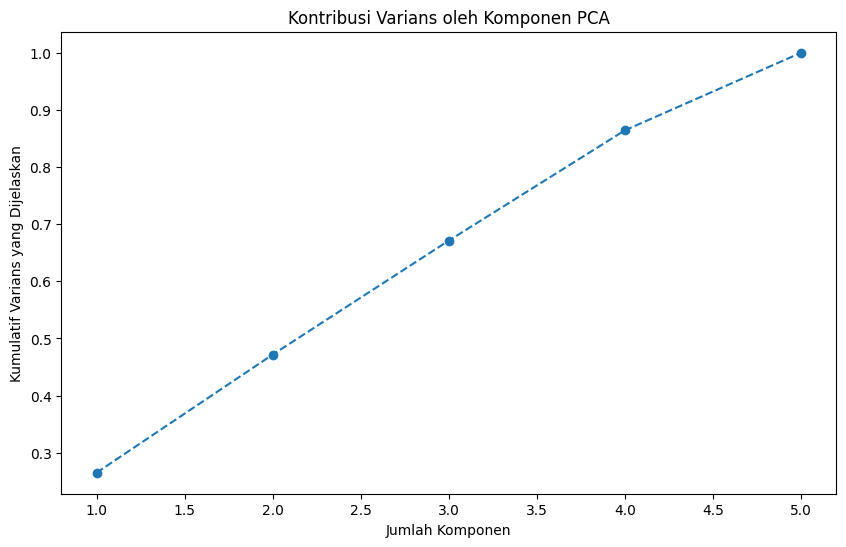

In [ ]:
# Assuming df_numerical contains the numerical features for clustering
clustering_data = df_numerical

# Standarisasi data sebelum PCA
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fit PCA pada data yang sudah distandarisasi
pca = PCA(n_components=len(numerical_cols))  # Pastikan menggunakan jumlah fitur numerik
pca_data = pca.fit_transform(clustering_data_scaled)

# Plot kontribusi varians setiap komponen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numerical_cols) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Kontribusi Varians oleh Komponen PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.show()

In [ ]:
# Menentukan jumlah fitur optimal berdasarkan 50% varians yang dijelaskan
n_components_optimal = sum(pca.explained_variance_ratio_.cumsum() <= 0.70)
print(f"\nJumlah fitur optimal berdasarkan PCA: {n_components_optimal}")

# Transformasi data berdasarkan fitur utama
reduced_data = PCA(n_components=n_components_optimal).fit_transform(clustering_data_scaled)

# Model clustering baru dengan data hasil reduksi dimensi
kmeans_reduced = KMeans(n_clusters=2, random_state=42)
cluster_labels_reduced = kmeans_reduced.fit_predict(reduced_data)

# Hitung Silhouette Score untuk data hasil feature selection
silhouette_score_reduced = silhouette_score(reduced_data, cluster_labels_reduced)
print(f"\nSilhouette Score dengan Feature Selection: {silhouette_score_reduced}")


Jumlah fitur optimal berdasarkan PCA: 3

Silhouette Score dengan Feature Selection: 0.3132324615245625


In [ ]:
# Bandingkan dengan Silhouette Score sebelumnya
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")
print(f"Silhouette Score dengan Feature Selection: {silhouette_score_reduced}")

# Jika Silhouette Score >= 0.55, simpan label klaster
if silhouette_score_reduced >= 0.55:
    valid_cluster_labels = cluster_labels_reduced
    print("Silhouette Score", silhouette_score_reduced, "disimpan")

    # Menyimpan hasil cluster ke dalam dataset
    dataset['Cluster_After_FS'] = valid_cluster_labels
    print("Cluster labels disimpan ke dalam dataset.")

else:
    valid_cluster_labels = None
    print("Silhouette Score < 0.55 tidak disimpan.")

print(valid_cluster_labels)

Silhouette Score Tanpa Feature Selection: 0.6181000110600853
Silhouette Score dengan Feature Selection: 0.3132324615245625
Silhouette Score < 0.55 tidak disimpan.
None


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
print("Kolom dalam Dataset:")
print(dataset.columns)

Kolom dalam Dataset:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Cluster'],
      dtype='object')


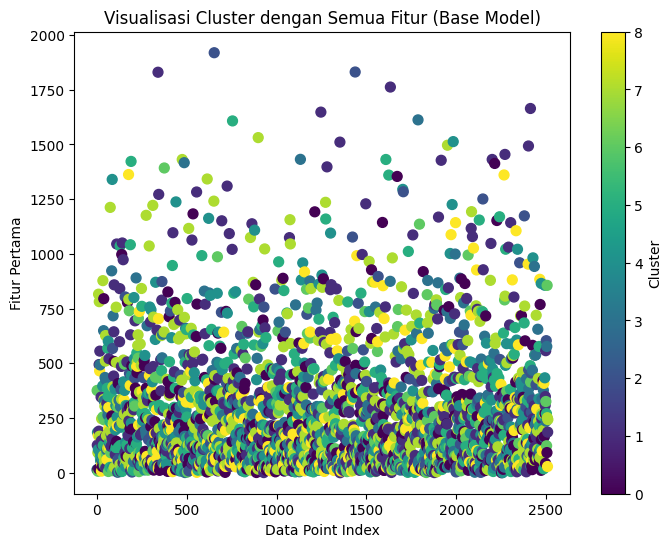

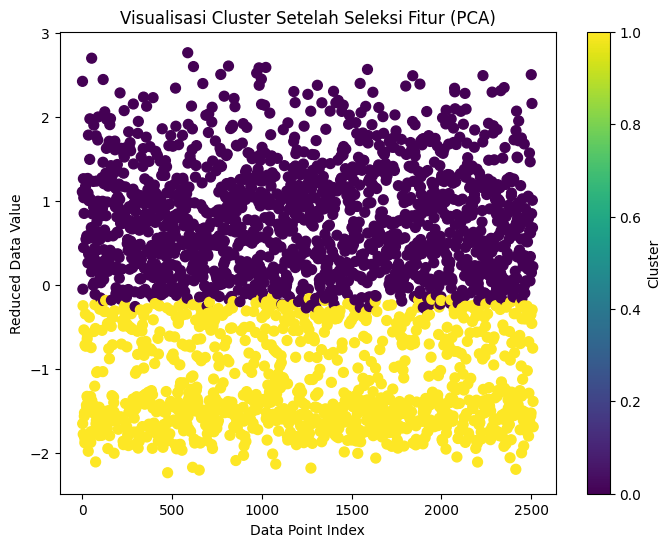

In [ ]:
# Visualisasi cluster dengan semua fitur (Base Model)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(clustering_data)), clustering_data.iloc[:, 0], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'Visualisasi Cluster dengan Semua Fitur (Base Model)')
plt.colorbar(label='Cluster')
plt.xlabel('Data Point Index')
plt.ylabel('Fitur Pertama')
plt.show()

# Visualisasi cluster setelah seleksi fitur (PCA)
print("\n")
plt.figure(figsize=(8, 6))
plt.scatter(range(len(reduced_data)), reduced_data[:, 0], c=cluster_labels_reduced, cmap='viridis', s=50)
plt.title(f'Visualisasi Cluster Setelah Seleksi Fitur (PCA)')
plt.colorbar(label='Cluster')
plt.xlabel('Data Point Index')
plt.ylabel('Reduced Data Value')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```


📌 Data setelah inverse transform:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128        4410.297491  2023-04-11 16:29:14   
1      TX000002   AC00455      110117.582785  2023-06-27 16:44:19   
2      TX000003   AC00019       37160.145372  2023-07-10 18:16:08   
3      TX000004   AC00070       54150.953261  2023-05-05 16:32:11   
4      TX000005   AC00411        4223.489090  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID  Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015        0   
1           Debit    Houston  D000051     13.149.61.4       M052        0   
2           Debit       Mesa  D000235  215.97.143.157       M009        2   
3           Debit    Raleigh  D000187  200.13.225.150       M002        2   
4          Credit    Atlanta  D000308    65.164.3.100       M091        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0  1289.87991

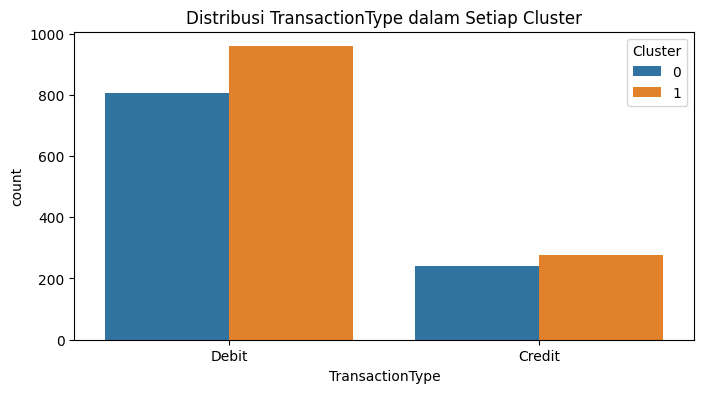


📌 Interpretasi Hasil Clustering:

🔹 **Cluster 1:**
  - TransactionAmount: Rata-rata 75979.38, dengan batas minimum 373.48 dan maksimum 260148.08
  - CustomerAge: Rata-rata 766.22, dengan batas minimum 364.87 dan maksimum 1467.77
  - TransactionDuration: Rata-rata 8509.31, dengan batas minimum 819.14 dan maksimum 21034.64
  - LoginAttempts: Rata-rata 1.73, dengan batas minimum 1.73 dan maksimum 1.73
  - AccountBalance: Rata-rata 8153739.10, dengan batas minimum 400006.11 dan maksimum 20985082.04
  - TransactionType: Kategori yang paling dominan adalah 'Debit' dengan persentase 77.63%

🔹 **Cluster 0:**
  - TransactionAmount: Rata-rata 73590.90, dengan batas minimum 391.00 dan maksimum 263928.03
  - CustomerAge: Rata-rata 925.82, dengan batas minimum 364.87 dan maksimum 1467.77
  - TransactionDuration: Rata-rata 8362.24, dengan batas minimum 819.14 dan maksimum 21104.59
  - LoginAttempts: Rata-rata 1.73, dengan batas minimum 1.73 dan maksimum 1.73
  - AccountBalance: Rata-rata 33888232.8

In [ ]:
# Salin dataset asli
df_original = dataset.copy()

# Pastikan label_encoders sudah ada sebelum inverse transform
existing_categorical_cols = [col for col in categorical_cols if col in df_original.columns]

# 🔹 **Label Encoding untuk Fitur Kategorikal**
label_encoders = {}

for col in existing_categorical_cols:
    if df_original[col].dtype == 'object':  # Hanya encode kolom bertipe string
        le = LabelEncoder()
        df_original[col] = le.fit_transform(df_original[col])
        label_encoders[col] = le

# Menentukan jumlah cluster & menambahkan label cluster ke dataset asli
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_original['Cluster'] = kmeans.fit_predict(df_preprocessed.loc[df_original.index])

# 🔹 **Inverse transform fitur kategorikal yang telah diencoding**
for col in categorical_features:
    if col in label_encoders:
        df_original[col] = label_encoders[col].inverse_transform(df_original[col].astype(int))
    else:
        print(f"⚠️ Warning: LabelEncoder untuk kolom '{col}' tidak ditemukan. Melewati inverse transform.")

# 🔹 **Inverse transform fitur numerik yang telah distandarisasi**
df_original[numerical_features] = scaler.inverse_transform(df_original[numerical_features])

# Menampilkan beberapa baris hasil inverse transform
print("\n📌 Data setelah inverse transform:")
print(df_original.head())

# 🔹 **Melakukan agregasi berdasarkan cluster**
def safe_mode(series):
    """ Mengembalikan nilai modus yang paling sering muncul, atau nilai pertama jika ada lebih dari satu modus. """
    mode_values = series.mode()
    return mode_values[0] if not mode_values.empty else np.nan

aggregated_data = df_original.groupby("Cluster").agg({
    **{col: ["mean", "min", "max"] for col in numerical_features},  # Mean, min, max untuk numerik
    **{col: safe_mode for col in categorical_features}  # Modus untuk kategorikal
})

# Menampilkan hasil agregasi
print("\n📊 Hasil Agregasi per Cluster:")
print(aggregated_data)

# 🔹 **Visualisasi Distribusi Fitur Kategorikal dalam Setiap Cluster**
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_original, x=col, hue='Cluster')
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.show()

# 🔹 **Interpretasi hasil clustering sesuai format yang diminta**
print("\n📌 Interpretasi Hasil Clustering:")
for cluster in df_original["Cluster"].unique():
    cluster_data = df_original[df_original["Cluster"] == cluster]

    print(f"\n🔹 **Cluster {cluster}:**")
    for col in numerical_features:
        mean_val = cluster_data[col].mean()
        min_val = cluster_data[col].min()
        max_val = cluster_data[col].max()
        print(f"  - {col}: Rata-rata {mean_val:.2f}, dengan batas minimum {min_val:.2f} dan maksimum {max_val:.2f}")

    for col in categorical_features:
        mode_val = safe_mode(cluster_data[col])  # Modus yang lebih aman
        mode_percentage = (cluster_data[col].value_counts(normalize=True).max()) * 100
        print(f"  - {col}: Kategori yang paling dominan adalah '{mode_val}' dengan persentase {mode_percentage:.2f}%")

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Salin dataset hasil encoding
df_original = dataset.copy()

# 🔹 **Melakukan inverse transform untuk fitur numerik yang telah dinormalisasi**
df_original[numerical_features] = scaler.inverse_transform(df_original[numerical_features])

# 🔹 **Mengembalikan fitur kategorikal ke bentuk aslinya**
for col in categorical_features:
    if col in label_encoders:
        # ❗ Get the encoded values from the original 'dataset' DataFrame
        encoded_values = dataset[col].map(label_encoders[col].classes_.tolist().index)

        # Now apply inverse_transform to the encoded values
        df_original[col] = label_encoders[col].inverse_transform(encoded_values.astype(int))
    else:
        print(f"⚠️ Warning: LabelEncoder untuk kolom '{col}' tidak ditemukan. Melewati inverse transform.")

# 🔹 **Menampilkan hasil setelah inverse transform**
print("\n📌 Data setelah inverse transform untuk fitur numerik:")
print(df_original[numerical_features].head())

print("\n📌 Data setelah inverse transform untuk fitur kategorikal:")
print(df_original[categorical_features].head())


📌 Data setelah inverse transform untuk fitur numerik:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0        4410.297491  1289.879913          5785.579512       1.727144   
1      110117.582785  1254.302601          9982.569290       1.727144   
2       37160.145372   382.658437          4036.833771       1.727144   
3       54150.953261   507.179032          1868.389053       1.727144   
4        4223.489090   507.179032         13969.709579       1.727144   

   AccountBalance  
0    1.994358e+07  
1    5.366715e+07  
2    4.382466e+06  
3    3.342587e+07  
4    2.898101e+07  

📌 Data setelah inverse transform untuk fitur kategorikal:
  TransactionType
0           Debit
1           Debit
2           Debit
3           Debit
4          Credit


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

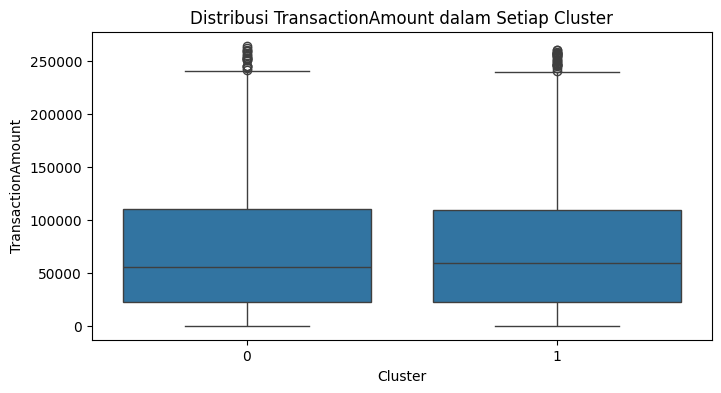

<Figure size 640x480 with 0 Axes>

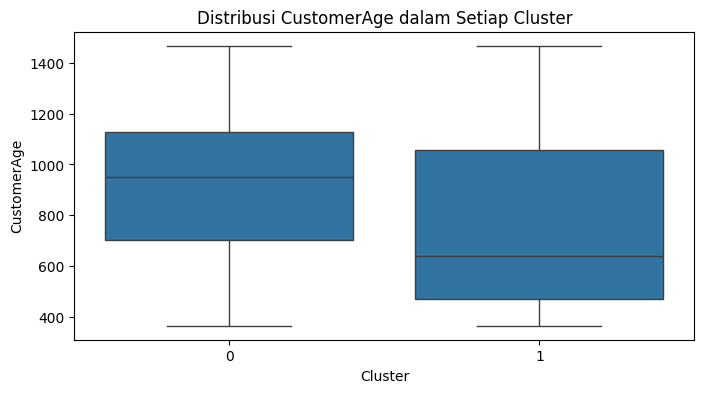

<Figure size 640x480 with 0 Axes>

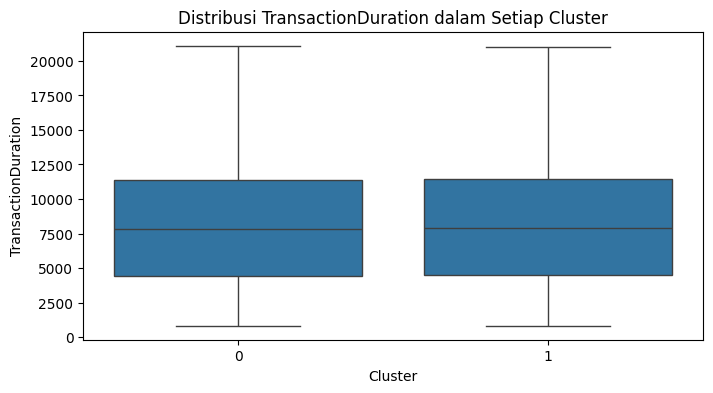

<Figure size 640x480 with 0 Axes>

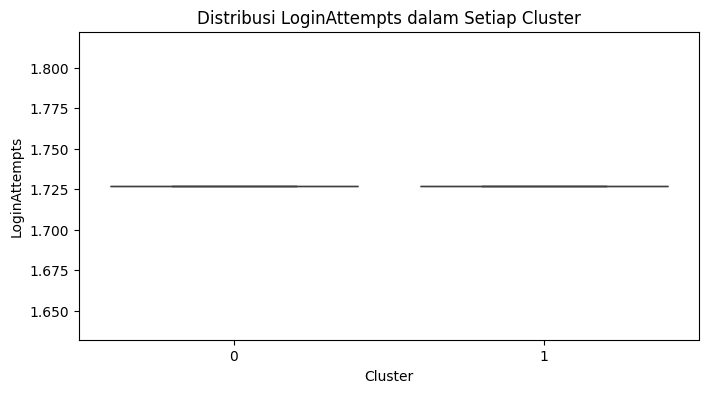

<Figure size 640x480 with 0 Axes>

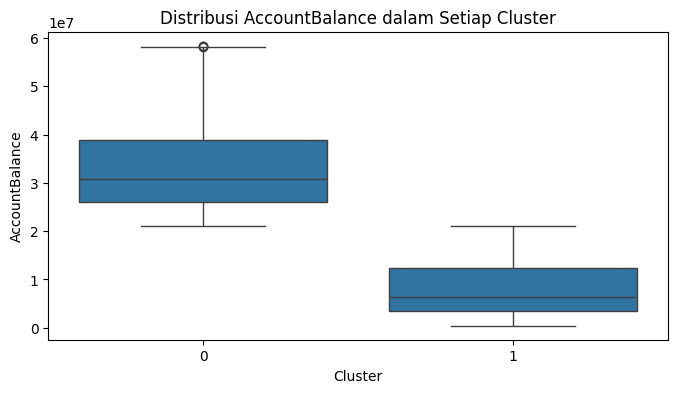

<Figure size 640x480 with 0 Axes>

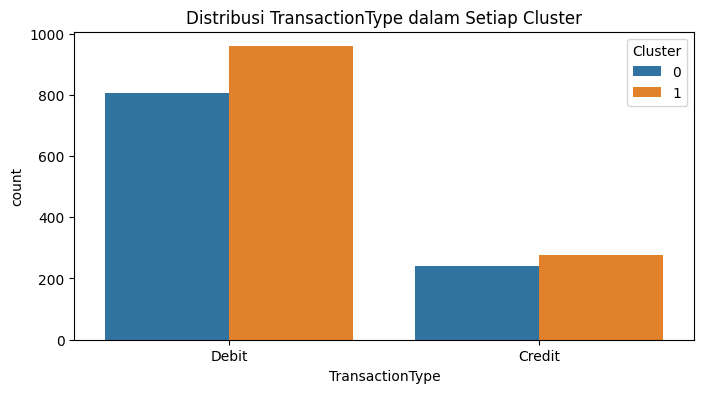


📊 Statistik Deskriptif per Cluster:
        TransactionAmount                                          \
                    count          mean           std         min   
Cluster                                                             
0                  1048.0  73590.900286  63045.982307  390.997979   
1                  1234.0  75979.383456  64019.322895  373.484691   

                                                                  CustomerAge  \
                  25%           50%            75%            max       count   
Cluster                                                                         
0        23105.732043  55474.665918  110299.283144  263928.031455      1048.0   
1        23020.354766  59472.073821  109633.778214  260148.080207      1234.0   

                     ... LoginAttempts           AccountBalance                \
               mean  ...           75%       max          count          mean   
Cluster              ...                         

<ipython-input-149-d8c9ae067aa6>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_original.groupby('Cluster')[numerical_features].describe())


<Figure size 640x480 with 0 Axes>

In [ ]:
# Pastikan Cluster bertipe kategori agar lebih efisien
df_original['Cluster'] = df_original['Cluster'].astype('category')

# 🔹 **Analisis distribusi fitur numerik dalam setiap cluster**
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_original, x='Cluster', y=col)
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.show()
    plt.tight_layout()  # Memastikan layout tidak terpotong

# 🔹 **Analisis distribusi fitur kategorikal dalam setiap cluster**
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_original, x=col, hue='Cluster')
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.show()
    plt.tight_layout()

# 🔹 **Statistik deskriptif per cluster**
print("\n📊 Statistik Deskriptif per Cluster:")
print(df_original.groupby('Cluster')[numerical_features].describe())

# 🔹 **Fungsi aman untuk mencari modus kategori**
def safe_mode(series):
    """ Mengembalikan modus yang paling sering muncul, atau NaN jika kosong """
    mode_values = series.mode()
    return mode_values[0] if not mode_values.empty else np.nan

# 🔹 **Interpretasi hasil clustering dengan format yang lebih jelas**
print("\n📌 Interpretasi Hasil Clustering:")
for cluster in df_original['Cluster'].cat.categories:  # Gunakan kategori unik
    cluster_data = df_original[df_original['Cluster'] == cluster]

    print(f"\n🔹 **Cluster {cluster}:**")
    for col in numerical_features:
        mean_val = cluster_data[col].mean()
        min_val = cluster_data[col].min()
        max_val = cluster_data[col].max()
        print(f"  - {col}: Rata-rata {mean_val:.2f}, dengan batas minimum {min_val:.2f} dan maksimum {max_val:.2f}")

    for col in categorical_features:
        mode_val = safe_mode(cluster_data[col])
        mode_percentage = (cluster_data[col].value_counts(normalize=True).max() * 100) if not cluster_data[col].empty else 0
        print(f"  - {col}: Kategori yang paling dominan adalah '{mode_val}' dengan persentase {mode_percentage:.2f}%")

# 📌 **Interpretasi Hasil Clustering**

## **Cluster 0**  

### **Karakteristik:**
- **Transaction Amount (Jumlah Transaksi):** 73,590.90  
  → Pelanggan dalam cluster ini melakukan **transaksi dengan jumlah rata-rata yang tinggi**, dengan variasi yang cukup besar.  
- **Customer Age (Usia Pelanggan):** 925.82  
  → Data menunjukkan nilai yang tidak realistis, kemungkinan ada kesalahan dalam dataset atau skala yang perlu dikonfirmasi.  
- **Transaction Duration (Durasi Transaksi):** 8,362.24 detik  
  → **Durasi transaksi sangat panjang**, bisa jadi menunjukkan adanya transaksi yang lebih kompleks atau masalah teknis pada data.  
- **Login Attempts (Percobaan Login):** 1.73  
  → Hampir semua pelanggan mengalami **jumlah percobaan login yang sama**, kemungkinan ada **faktor keamanan yang membatasi login**.  
- **Account Balance (Saldo Akun):** 33,888,232.83  
  → **Saldo akun sangat besar**, menunjukkan bahwa pelanggan dalam cluster ini memiliki daya beli tinggi.  
- **Transaction Type (Jenis Transaksi):** **Debit (76.91%)**  
  → Mayoritas transaksi dalam cluster ini dilakukan dengan **debit**, menunjukkan kebiasaan menggunakan saldo langsung daripada kredit.  

### **Interpretasi:**
Cluster 0 berisi **pelanggan dengan transaksi besar**, saldo akun tinggi, dan dominasi transaksi **debit**.  
Namun, terdapat **anomali dalam usia pelanggan dan durasi transaksi**, yang perlu ditelusuri lebih lanjut.  

---

## **Cluster 1**  

### **Karakteristik:**
- **Transaction Amount (Jumlah Transaksi):** 75,979.38  
  → Pelanggan dalam cluster ini melakukan **transaksi dalam jumlah rata-rata yang sedikit lebih tinggi dibanding Cluster 0**.  
- **Customer Age (Usia Pelanggan):** 766.22  
  → **Usia pelanggan masih terlihat tidak realistis**, menandakan kemungkinan adanya kesalahan dalam data.  
- **Transaction Duration (Durasi Transaksi):** 8,509.31 detik  
  → **Durasi transaksi sedikit lebih panjang dibanding Cluster 0**, menunjukkan pola transaksi yang mirip.  
- **Login Attempts (Percobaan Login):** 1.73  
  → Sama seperti Cluster 0, pelanggan dalam cluster ini mengalami **jumlah percobaan login yang seragam**.  
- **Account Balance (Saldo Akun):** 8,153,739.10  
  → **Saldo akun lebih rendah dibanding Cluster 0**, menunjukkan daya beli yang lebih kecil.  
- **Transaction Type (Jenis Transaksi):** **Debit (77.63%)**  
  → Transaksi **debit masih dominan**, dengan persentase yang sedikit lebih tinggi dari Cluster 0.  

### **Interpretasi:**
Cluster 1 terdiri dari pelanggan yang memiliki **saldo akun lebih rendah dibanding Cluster 0**, tetapi masih melakukan transaksi dengan jumlah besar.  
Namun, masih terdapat **anomali dalam data usia pelanggan dan durasi transaksi**, yang perlu diklarifikasi.  

---

# **Kesimpulan**  

Berdasarkan hasil clustering dengan K-Means, dapat disimpulkan bahwa:  

1. **Cluster 0** terdiri dari pelanggan **dengan saldo akun sangat tinggi**, yang cenderung melakukan transaksi besar dengan **debit**.  
2. **Cluster 1** terdiri dari pelanggan **dengan saldo lebih rendah**, tetapi masih memiliki pola transaksi serupa dengan Cluster 0.  
3. **Terdapat anomali dalam usia pelanggan dan durasi transaksi**, yang memerlukan **pemeriksaan lebih lanjut terhadap kualitas data**.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan dataset ke dalam file CSV
output_file = 'hasil_clustering.csv'
dataset.to_csv(output_file, index=False)
print(f"Dataset telah berhasil disimpan ke file: {output_file}")

Dataset telah berhasil disimpan ke file: hasil_clustering.csv
